In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.ticker as ticker
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline
import re
from os import listdir
from os.path import isfile, join

In [2]:
def ReadData(policyList):
    fullDf = None
    fullTime = None
    for i in range(0, len(policyList)):
        policy = policyList[i]
        dFilename = 'phase1/' + policy + "_gym_metrics.csv"
        tFilename = 'phase1/' + policy + "_gym_time.csv"
        dataFrame = pd.read_csv(dFilename)
        timeFrame = pd.read_csv(tFilename)
        if (i == 0):
            fullDf = dataFrame
            fullTime = timeFrame
        else:
            fullDf = pd.concat([dataFrame, fullDf], axis=0)
            fullTime = pd.concat([timeFrame, fullTime], axis=0)
    return fullDf, fullTime
        

In [3]:
# Load Data
# Generating All graphs for Simulation
print("Generating Simulated Graphs")
policyList = ['ref', 'GoAlone', 'nicePPO', 'nicePIPS', 'niceBC', 'dqn', 'gail']
fullDf, fullTime = ReadData(policyList)

averageDf = fullDf
print(list(fullDf.columns))
print(list(fullTime.columns))

Generating Simulated Graphs
['Unnamed: 0', 'DistScore', 'Force', 'Blame', 'Policy', 'Human Count', 'Total Time', 'Trial']
['Unnamed: 0', 'Trial', 'Human Count', 'Success', 'Collision', 'Final Time', 'Reward', 'Policy']


In [4]:
# Setup SNS settings
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8, "axes.facecolor": "0.95"})
columnwidth = 3.40067
linewidth = 7.00137
#columnwidth = 9.40067
#linewidth = 21.00137
sns.set_context("paper", rc={"font.size":2,"axes.titlesize":2,"axes.labelsize":8})   


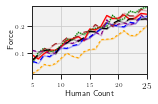

In [5]:
# Force Line Plots
#dashes = []   
dashes = ["", (1, 1), (2, 2), (3,3), (4,4), (5,5), (6,6)]
palette = ['red', 'green', 'orange', 'purple', 'blue', 'brown', 'black']
hue_order = ['GoAlone', 'Ref', 'DQN', 'PPO', 'BC', 'GAIL', 'PIPS']
plot = sns.lineplot(data=averageDf, ci=99, x="Human Count", y="Force", style_order=hue_order, dashes=dashes, hue="Policy", hue_order=hue_order, palette=palette, style="Policy", legend=None)

# Plot Settings
#plt.xlim(2, 20)
#plt.ylim(0, 0.8)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.25*linewidth, h=0.15*linewidth)
# Plot Settings# Plot Settings
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.xlabel("Human Count",labelpad=0)
plt.ylabel("Force",labelpad=0.3)
plt.margins(0,0)
plt.grid()
#plt.show()
plt.savefig("phase1/force.pgf", bbox_inches = 'tight', pad_inches = 0) 

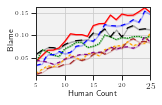

In [6]:
# Blame Line Plot   
dashes = ["", (1, 1), (2, 2), (3,3), (4,4), (5,5), (6,6)]
palette = ['red', 'green', 'orange', 'purple', 'blue', 'brown', 'black']
hue_order = ['GoAlone', 'Ref', 'DQN', 'PPO', 'BC', 'GAIL', 'PIPS']
plot = sns.lineplot(data=averageDf, ci=99, x="Human Count", style_order=hue_order, y="Blame", dashes=dashes, hue="Policy", style="Policy", palette=palette, hue_order=hue_order, legend=None)

# Plot Settings
#plt.xlim(2, 20)
#plt.ylim(0.0, 0.25)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.25*linewidth, h=0.15*linewidth)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
#plot.set_yticks([0.01, 0.02, 0.03]) # <--- set the ticks first
#plot.set_yticklabels(['0.01','0.02','0.03'])
plt.xlabel("Human Count",labelpad=0.1)
plt.ylabel("Blame",labelpad=0.3)
plt.margins(0,0)
plt.grid()
#plt.show()


plt.savefig("phase1/blame.pgf", bbox_inches = 'tight', pad_inches = 0) 

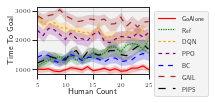

In [7]:
# Time Line Graph   
dashes = ["", (1, 1), (2, 2), (3,3), (4,4), (5,5), (6,6)]
palette = ['red', 'green', 'orange', 'purple', 'blue', 'brown', 'black']
hue_order = ['GoAlone', 'Ref', 'DQN', 'PPO', 'BC', 'GAIL', 'PIPS']
kws = {"linewidth" : 0.0}
plot = sns.lineplot(x="Human Count", y="Final Time", hue="Policy", style="Policy", data=fullTime,  err_kws = kws, dashes=dashes, style_order=hue_order, palette=palette, hue_order=hue_order, legend="brief");

# Plot Settings
plot.legend(loc=2, bbox_to_anchor=(1.01, 1.0), frameon=True)

plt.xlim(5, 25)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.30*linewidth, h=0.15*linewidth)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='6') # for legend title,
plt.xlabel("Human Count",labelpad=0)
plt.ylabel("Time To Goal",labelpad=0.3)
plt.margins(0,0)
plt.grid()
# Save Plot to File

plt.savefig("phase1/time.pgf", bbox_inches = 'tight', pad_inches = 0) 

In [8]:
print("Success Rates")
refDf = fullTime[fullTime["Policy"] == "Ref"]
gaDf = fullTime[fullTime["Policy"] == "GoAlone"]
gaDf = gaDf.head(2000)
pipsDf = fullTime[fullTime["Policy"] == "PIPS"]
bcDf = fullTime[fullTime["Policy"] == "BC"]
gailDf = fullTime[fullTime["Policy"] == "GAIL"]
ppoDf = fullTime[fullTime["Policy"] == "PPO"]
dqnDf = fullTime[fullTime["Policy"] == "DQN"]
print("Total Episodes: " + str(len(refDf['Success'])))
print("Successful Episodes")
print("Ref: " + str(refDf['Success'].value_counts() / 2000))
print("GA: " + str(gaDf['Success'].value_counts() / 2000))
print("PIPS: " + str(pipsDf['Success'].value_counts() / 2000))
print("BC: " + str(bcDf['Success'].value_counts() / 2000))
print("GAIL: " + str(gailDf['Success'].value_counts()/ 2000))
print("PPO: " + str(ppoDf['Success'].value_counts() / 2000))
print("DQN: " + str(dqnDf['Success'].value_counts() / 2000))

Success Rates
Total Episodes: 2000
Successful Episodes
Ref: 1    0.894
0    0.106
Name: Success, dtype: float64
GA: 1    0.9745
0    0.0255
Name: Success, dtype: float64
PIPS: 1    0.889
0    0.111
Name: Success, dtype: float64
BC: 1    0.9225
0    0.0760
Name: Success, dtype: float64
GAIL: 0    0.833
1    0.166
Name: Success, dtype: float64
PPO: 0    0.551
1    0.449
Name: Success, dtype: float64
DQN: 1    0.5410
0    0.4565
Name: Success, dtype: float64
